# Linear Regression with One Variable - Gradient Descent

## Initialisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='serif', size=18)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
np.set_printoptions(precision=4)

## Load Data

In [2]:
path = r'C:\Users\L\Documents\Machine Learning with Andrew Ng\01_linear_regression'
data = np.loadtxt(fname=f'{path}//ex1data1.txt', delimiter=',')
X = data[:, 0].reshape(-1, 1) # This is important for mat. mult. in numpy.
y = data[:, -1].reshape(-1, 1) # This is important for mat. mult. in numpy.
m = len(y)

#### See the dimensions

In [3]:
print(f"X dims: {X.shape}\ny dims: {y.shape}")

X dims: (97, 1)
y dims: (97, 1)


#### Print out some datapoints

In [4]:
print("First 10 examples from dataset:\n")
print(f" X =\n {X[:10, :]}\n")
print(f" y =\n {y[:10, :]}")

First 10 examples from dataset:

 X =
 [[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]
 [8.3829]
 [7.4764]
 [8.5781]
 [6.4862]
 [5.0546]]

 y =
 [[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]
 [11.886 ]
 [ 4.3483]
 [12.    ]
 [ 6.5987]
 [ 3.8166]]


In [5]:
def plot_data(x, y, xlabel='x', ylabel='y'):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.grid(ls='dashed', c='grey', zorder=-1)
    ax.scatter(x, y, s=25)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
#     ax.set_xlabel('Population of City (10,000s)')
#     ax.set_ylabel('Profit ($10,000s)')
    
#     plt.show()
    return ax

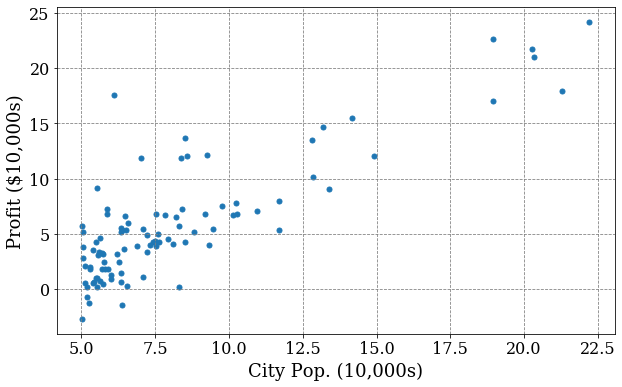

In [6]:
ax = plot_data(X, y, 'City Pop. (10,000s)', 'Profit ($10,000s)')

#### Add the intercept term to X

In [7]:
X = np.c_[np.ones(m), X]
n = X.shape[1] # n as number of feature columns in X.
print("First 10 examples of X (normalised) with intercept:\n")
print(f" X =\n {X[:10, :]}\n")

First 10 examples of X (normalised) with intercept:

 X =
 [[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]
 [1.     8.3829]
 [1.     7.4764]
 [1.     8.5781]
 [1.     6.4862]
 [1.     5.0546]]



## Gradient Descent

In [8]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X @ theta
    J = 1 / (2*m) * np.sum((h - y)**2)
    return J

In [9]:
def gradient_descent(X, y, theta, alpha, n_iterations):
    m = y.shape[0]
    J_history = []
    
    for i in range(n_iterations):
        h = X @ theta
        theta -= alpha * (1 / m) * (X.T @ (h - y))
        J_history.append(compute_cost(X, y, theta))
    
    return theta, J_history

In [10]:
def plot_cost(J):
    fig, ax = plt.subplots()
    ax.plot(range(len(J)), J)
    ax.set_xlabel('iteration')
    ax.set_ylabel('Cost J')
    ax.grid(ls='dashed', c='grey')
    plt.show()
    return

In [11]:
n_iters = 1500
alpha = 0.01

In [12]:
# Initialise theta parameters
theta = np.zeros((n, 1))
# Compute & display initial cost with zeros thetas
J = compute_cost(X=X, y=y, theta=theta)
print(f'With theta = \n{theta}\nCost computed = {round(J, 4)}\n')
# Compute & display cost again with different thetas
J = compute_cost(X=X, y=y, theta=np.array([[-1], [2]]))
print(f'With theta = \n[[-1.]\n [2.]]\nCost computed = {round(J, 4)}')

With theta = 
[[0.]
 [0.]]
Cost computed = 32.0727

With theta = 
[[-1.]
 [2.]]
Cost computed = 54.2425


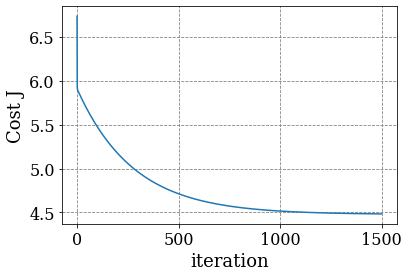

Theta computed from gradient descent: 
[[-3.6303]
 [ 1.1664]]



In [13]:
# Run the algorithm
theta, J_history = gradient_descent(X, y, theta, alpha, n_iters)
# Plot the convergence
plot_cost(J_history)
# Print the outputs
print(f"Theta computed from gradient descent: \n{theta}")
print()

<Figure size 432x288 with 0 Axes>

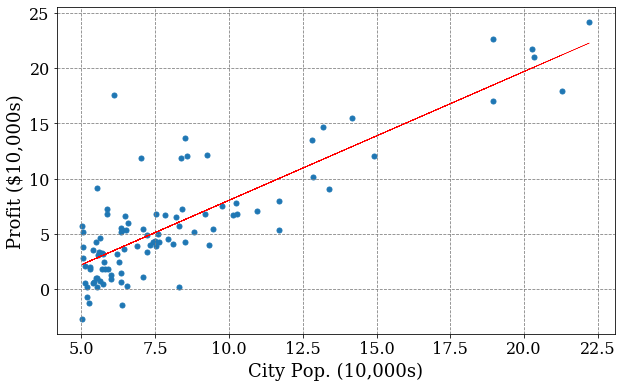

In [14]:
# Plot the line
fig = plt.figure()
ax = plot_data(X[:, 1], y, 'City Pop. (10,000s)', 'Profit ($10,000s)')
ax.plot(X[:, 1], X@theta, lw=0.5, c='red')
plt.show()

In [15]:
# Predict
pred1 = np.array([1, 3.5]) @ theta
print(f'For population = 35000, predicted profit = {pred1.item() * 10000}')
pred2 = np.array([1, 7]) @ theta
print(f'For population = 70000, predicted profit = {pred2.item() * 10000}')

For population = 35000, predicted profit = 4519.7678677017675
For population = 70000, predicted profit = 45342.45012944714


# Linear Regression with Multiple Variables - Gradient Descent

## Load Data

In [16]:
path = r'C:\Users\L\Documents\Machine Learning with Andrew Ng\01_linear_regression'
data = np.loadtxt(fname=f'{path}//ex1data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, -1].reshape(-1, 1) # This is important for mat. mult. in numpy.
m = len(y)

#### See the dimensions

In [17]:
print(f"X dims: {X.shape}\ny dims: {y.shape}")

X dims: (47, 2)
y dims: (47, 1)


#### Print out some datapoints

In [18]:
print("First 10 examples from dataset:\n")
print(f" X =\n {X[:10, :]}\n")
print(f" y =\n {y[:10, :]}")

First 10 examples from dataset:

 X =
 [[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]]

 y =
 [[399900.]
 [329900.]
 [369000.]
 [232000.]
 [539900.]
 [299900.]
 [314900.]
 [198999.]
 [212000.]
 [242500.]]


#### Plot the data

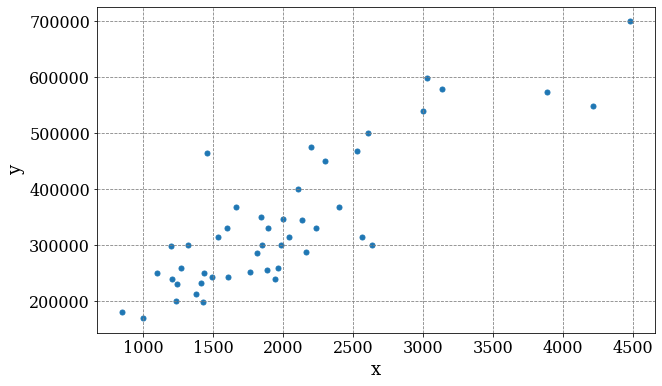

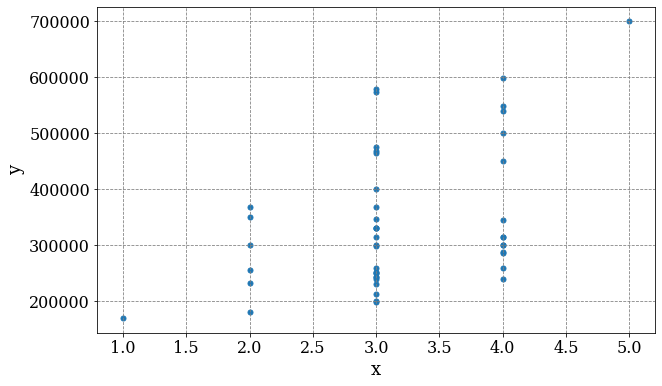

In [19]:
# Loop over and plot the first few vars unless large dataset
if X.shape[0] <= 10:
    for c in range(X.shape[0]):
        plot_data(X[:, c])
else:
    # Dataset has more than 10 features so just print first 2
    # Just print the first 2
    plot_data(X[:, 0], y)
    plot_data(X[:, 1], y)

#### Feature Normalization

In [20]:
def normalise(x):
    mu = x.mean(axis=0)
    sigma = x.std(axis=0, ddof=1)
    x_norm = (x - mu) / sigma
    return x_norm, mu, sigma

X, mu, sigma = normalise(X)

In [21]:
print("First 10 examples of X (normalised):\n")
print(f" X =\n {X[:10, :]}\n")

First 10 examples of X (normalised):

 X =
 [[ 0.13   -0.2237]
 [-0.5042 -0.2237]
 [ 0.5025 -0.2237]
 [-0.7357 -1.5378]
 [ 1.2575  1.0904]
 [-0.0197  1.0904]
 [-0.5872 -0.2237]
 [-0.7219 -0.2237]
 [-0.781  -0.2237]
 [-0.6376 -0.2237]]



#### Add the intercept term to X

In [22]:
X = np.c_[np.ones(m), X]
n = X.shape[1] # n as number of feature columns in X.
print("First 10 examples of X (normalised) with intercept:\n")
print(f" X =\n {X[:10, :]}\n")

First 10 examples of X (normalised) with intercept:

 X =
 [[ 1.      0.13   -0.2237]
 [ 1.     -0.5042 -0.2237]
 [ 1.      0.5025 -0.2237]
 [ 1.     -0.7357 -1.5378]
 [ 1.      1.2575  1.0904]
 [ 1.     -0.0197  1.0904]
 [ 1.     -0.5872 -0.2237]
 [ 1.     -0.7219 -0.2237]
 [ 1.     -0.781  -0.2237]
 [ 1.     -0.6376 -0.2237]]



## Gradient Descent

In [23]:
alpha = 0.01
n_iters = 500

#### Run gradient descent and plot the convergence graph

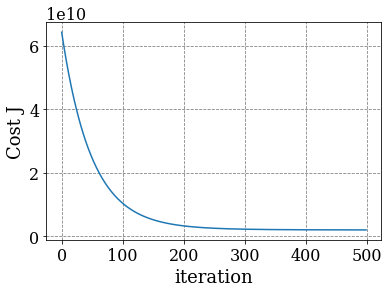

Theta computed from gradient descent: 
[[3.3818e+05]
 [1.0383e+05]
 [1.0303e+02]]



In [24]:
# Initialise theta parameters
theta = np.zeros((n, 1))
# Run the algorithm
theta, J_history = gradient_descent(X, y, theta, alpha, n_iters)
# Plot the convergence
plot_cost(J_history)
# Print the outputs
print(f"Theta computed from gradient descent: \n{theta}")
print()

## Making Predictions

In [25]:
def predict(to_predict, mu, sigma, theta):
    normed = (to_predict - mu)/sigma
    normed = np.insert(normed, 0, 1)
    prediction = normed @ theta
    return prediction.item()

In [26]:
prediction = predict(np.array([1650, 3]), mu, sigma, theta)
print(f'Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n${round(prediction, 2)}')

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
$292335.05


# Linear Regression with Multiple Variables - Normal Equations

## Load Data

In [27]:
path = r'C:\Users\L\Documents\Machine Learning with Andrew Ng\01_linear_regression'
data = np.loadtxt(fname=f'{path}//ex1data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, -1].reshape(-1, 1) # This is important for mat. mult. in numpy.
m = len(y)

#### Add the intercept term

In [28]:
X = np.c_[np.ones(m), X]

In [29]:
def normal_eqn(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y

In [30]:
normal_eqn_theta = normal_eqn(X,y)

In [31]:
prediction = np.array([1, 1650, 3]) @ normal_eqn_theta
print(f'Predicted price of a 1650 sq-ft, 3 br house (using noraml equation):\n${round(prediction.item(), 2)}')

Predicted price of a 1650 sq-ft, 3 br house (using noraml equation):
$293081.46
